# Cellular Automata

(notes-subplots-ref)=
## Advanced Plotting

The plotting library `matplotlib` is capable of producing quite sophisticated and professional-looking figures. The [online documentation](https://matplotlib.org/stable/gallery/index.html) contains a number of [examples including demonstration code](https://matplotlib.org/stable/gallery/index.html).

One of the most useful techniques allows you to include multiple plots in a single Figure. To use it we have to use Matplotlib's 'explicit' interface, where we create `figure` and `axis` objects and then call methods on them using an 'object-oriented' style syntax. A full understanding of this style of programming is out of the scope of this course, but you should nevertheless be able to make use of this functionality by adapting the examples below.

First let's take an example using Matplotlib's 'implicit' (conventional) syntax to plot the functions $\sin(x)$ and $\sin(2x)$ on two separate figures.

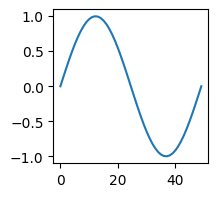

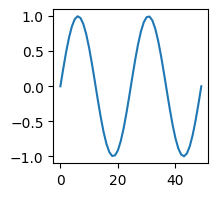

In [7]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2 * np.pi)
x1 = np.sin(t)
x2 = np.sin(2*t)

plt.figure(figsize=(2,2))
plt.plot(t, x1)

plt.figure(figsize=(2,2))
plt.plot(t, x2)

Next we will use Matplotlib's explicit interface to plot the two curves on one figure. In Matplotlib, a `Figure` object represents a graphical container within which we can plot onto a number of `Axis` objects. Up to now, our figures have each contained exactly one axis. Now we will see how to create figures containing multiple axes.

The function `plt.subplots` create a `Figure` object and a collection of `Axis` objects. `plt.subplots(n, m)` creates a figure comprising an `n` by `m` grid of axes.

Instead of `plt.plot` we use `axes[i].plot` where `i` is the index of the axis we would like to plot onto.

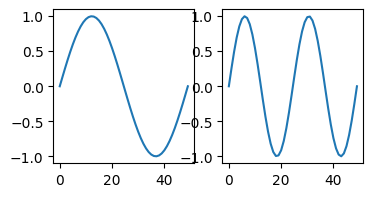

In [12]:

fig, axes = plt.subplots(1, 2, figsize=(4, 2))
axes[0].plot(x1)
axes[1].plot(x2)

Unfortunately, Matplotlib doesn't always do a good job of arranging the axes within the figure! You might need to tweak the layout using Matplotlib's vast library of functions. Here, we use the function `subplots_adjust` to add white space between the axes. 

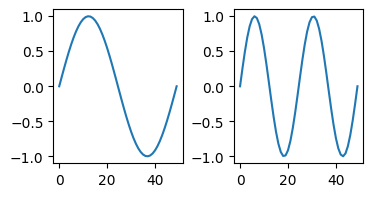

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(4, 2))
axes[0].plot(x1)
axes[1].plot(x2)
fig.subplots_adjust(wspace=0.4)


Alternatively, we might like to remove the axes entirely.

(-2.45, 51.45, -1.0994348378207568, 1.0994348378207568)

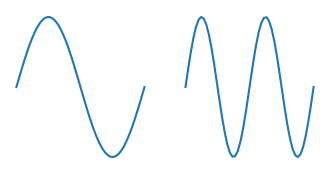

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(4, 2))
axes[0].plot(x1)
axes[1].plot(x2)

axes[0].axis("off")
axes[1].axis("off")

:::{exercise}
:label: exercise_5_1
Use a `for` loop to plot $\sin(nx)$ for $n=1 \ldots 10$ on a single figure   as below.
:::

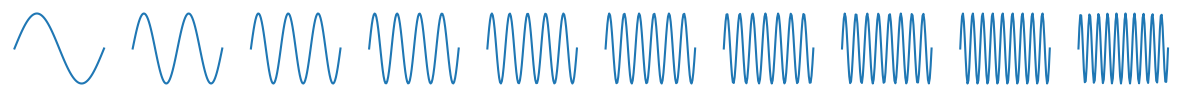

In [37]:
t = np.linspace(0, 2 * np.pi, 100)
N = 10

fig, axes = plt.subplots(1, N, figsize=(N, 1))
for i in range(N):
    axes[i].plot(np.sin(t * (i+1)))
    axes[i].axis("off")


:::{solution} exercise_5_1
:class: dropdown

```
t = np.linspace(0, 2 * np.pi, 100)
N = 10

fig, axes = plt.subplots(1, N, figsize=(N, 1))
for i in range(N):
    axes[i].plot(np.sin(t * (i+1)))
    axes[i].axis("off")
```
:::

## Multi-dimensional Arrays

Numpy arrays come is various types, shapes and sizes. So far we have studied 1-dimensional and 2-dimensional arrays. Elements of a 1-d array are access by one index variable: 

In [55]:
a1 = np.array([1, 2, 3, 4])

print(a1[0]) # element at index 0


1
8


On the other hand, 2-d arrays require 2 index variables:

In [68]:
a2 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])

print(a2[2, 1]) # element at row 2 column 1

8


Numpy arrays can have as many dimensions as we like. For example, the array in {numref}`3d_arrays-fig` (right) has 3 dimensions.



```{figure} 3d_arrays.png
---
height: 300px
name: 3d_arrays-fig
---
A 1-dimensional array is indexed by 1 coordinates `x[i]`. A 2-dimensional array is indexed by 2 coordinates `x[i,j]`.A 3-dimensional array is indexed by 3 coordinates `x[i,j,k]`. In the 3-d array above (right), `x[0,2,1] = 4`.
```


We can create this 3d array by stacking 2d arrays together. Notice how it is built from four `3` by `2` arrays each corresponding to a horizontal layer of the array shown in  {numref}`3d_arrays-fig` (right).

In [63]:
x = np.array([[[1, 2],
              [4, 3],
              [7, 4]],

              [[2, 0],
              [9, 0],
              [7, 5]],
              
              [[1, 0],
              [3, 0],
              [0, 2]],
              
              [[9, 0],
              [6, 0],
              [9, 8]]])

1

Each element of `x` is now indexed by three variables:

In [64]:
print(x[0, 2, 1])

4


We can recover the individual 2d arrays using slice notation. The top 'layer' of the array is given by:

In [70]:
print(x[0,:,:])

[[1 2]
 [4 3]
 [7 4]]


:::{exercise}
:label: exercise_5_2

Use slice notation to obtain the **front face** and **front corner** of the array `x`:

```
[[1 4 7]
 [2 9 7]
 [1 3 0]
 [9 6 9]]
```

and

```
[7 7 0 9]
```

:::

:::{solution} exercise_5_2
:class: dropdown

```
print(x[:,:,0]) # front face
print(x[:,2,0]) # front corner
```
:::